In [1]:
import numpy as np
import re
import matplotlib.pyplot as plt

# Usage

To use `orbconformal` in a project:

In [2]:
import orbconformal as oc

print(oc.__version__)

0.0.1


## Example of data cleaning

In [3]:
tc_rad = oc.tc_rad

In [4]:
values_only = ["RAD"+re.sub("\.0","",rad) for rad in list(tc_rad.columns)[1:]]
new_cols = ["time"] + values_only

In [5]:
tc_rad = tc_rad.drop(axis = 0, index = 0)

new_column_dict = dict(zip(list(tc_rad.columns),
                           list(new_cols)
                           ))

tc_rad = tc_rad.rename(columns = new_column_dict)
tc_rad_mat = np.array(tc_rad[values_only])

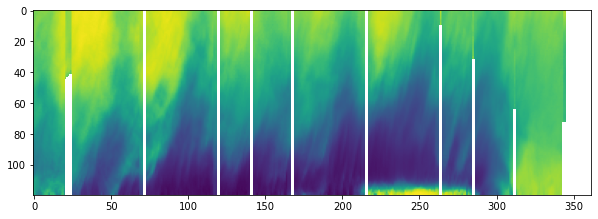

In [6]:
fig, ax = plt.subplots(figsize = (10,12))
ax.imshow(tc_rad_mat.T[::-1])

### Linear Interpolation

#### A little clean up first

First, need to figure out which rows are missing:

In [7]:
na_info = np.isnan(tc_rad_mat).mean(axis = 1)

and identify and get ride of the rows at the end that don't have anything in them.

In [8]:
if (na_info == 1)[-1]:
    empty_final_rows = np.sum(np.cumsum((na_info > 0)[::-1]) == \
                          np.arange(1,na_info.shape[0]+1, dtype = int))

In [9]:
tc_rad_clean = tc_rad.drop(
    list(np.arange(na_info.shape[0]-empty_final_rows+1, 
                   na_info.shape[0]+1)))

tc_rad_mat_clean = tc_rad_mat = np.array(tc_rad_clean[values_only])

#### actual linear interp tidying

In [10]:
na_info_clean = np.isnan(tc_rad_mat_clean).mean(axis = 1)

In [11]:
updated = oc.linear_interp(tc_rad_mat_clean, na_info_clean)

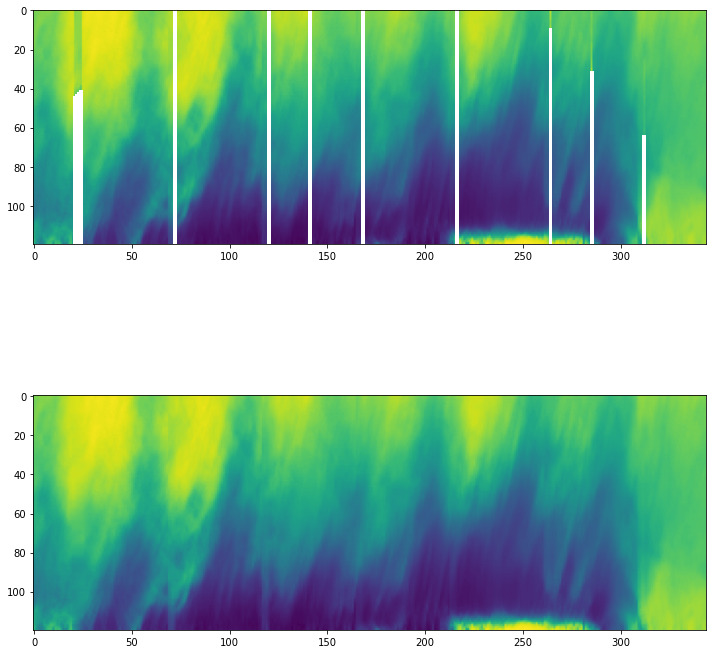

In [12]:
fig, ax = plt.subplots(nrows = 2, figsize = (10,12))
ax[0].imshow(tc_rad_mat_clean.T[::-1])
ax[1].imshow(updated.T[::-1])
fig.tight_layout()